# Install and Import Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib tensorflowjs

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR-CONVERSION BGR-to-RGB
    image.flags.writeable = False                  # Convert image to not-writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Convert image to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR-COVERSION RGB-to-BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

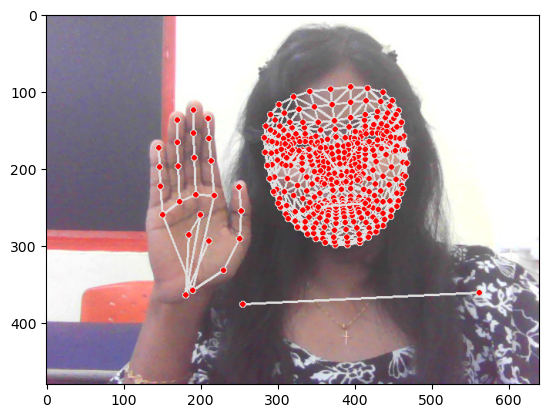

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Setup Folders for Collection

In [11]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('path_to_data') 

# Actions that we try to detect
actions = np.array(['cat', 'food', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [19]:
signs = ['cat','food','help']

parent_folder = 'path_to_data'

if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)
    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)
        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)


# Collect Keypoint Values for Training and Testing

In [20]:
signs = ['cat', 'food', 'help']  # Add your actions (words)
no_sequences = 30  # Number of sequences per action
sequence_length = 30  # Length of each sequence
DATA_PATH = 'path_to_data'  # Path to save the data


# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in signs:
    # Loop through sequences aka videos
        for sequence in range(no_sequences):
        # Load the corresponding video for the action (e.g., hello.mp4, thanks.mp4)
            video_path = os.path.join('path_to_videos', f'{action}.mp4')  # Adjust the path
            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"Error: Could not open video file {video_path}")
                continue

            # Get total number of frames in the video
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            print(f"Total frames in video {action}: {total_frames}")

            # Loop through video frames aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    print(f"End of video for action {action}")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic for the first frame
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            cap.release()
            cv2.destroyAllWindows()




Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video food: 81
Total frames in video food: 81
Total frames in video food: 81
Total f

In [12]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{'cat': 0, 'food': 1, 'help': 2}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
X = np.array(sequences)

In [18]:
y = to_categorical(labels).astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Build and Train LSTM Neural Network

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
# Load your data (Assuming you've already generated X_train, X_test, y_train, y_test)
# X contains the sequences, y contains the labels

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Reshape the data for models that don't require time sequences (RandomForest, SVM)
# Flatten the input for each sequence
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, np.argmax(y_train, axis=1))

# Predictions for Random Forest
rf_yhat = rf_model.predict(X_test_flat)
rf_ytrue = np.argmax(y_test, axis=1)
rf_conf_matrix = multilabel_confusion_matrix(rf_ytrue, rf_yhat)
rf_accuracy = accuracy_score(rf_ytrue, rf_yhat)

print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(rf_ytrue, rf_yhat))


Random Forest Confusion Matrix:
 [[[3 0]
  [0 2]]

 [[3 0]
  [0 2]]

 [[4 0]
  [0 1]]]
Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [24]:
rf_model.__module__

'sklearn.ensemble._forest'

In [25]:

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train_flat, np.argmax(y_train, axis=1))


# Predictions for SVM
svm_yhat = svm_model.predict(X_test_flat)
svm_ytrue = np.argmax(y_test, axis=1)
svm_conf_matrix = multilabel_confusion_matrix(svm_ytrue, svm_yhat)
svm_accuracy = accuracy_score(svm_ytrue, svm_yhat)

print("SVM Confusion Matrix:\n", svm_conf_matrix)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(svm_ytrue, svm_yhat))

SVM Confusion Matrix:
 [[[3 0]
  [0 2]]

 [[3 0]
  [0 2]]

 [[4 0]
  [0 1]]]
SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
#While training access tensorboard
#tensorboard --logdir=.

NameError: name 'TensorBoard' is not defined

In [21]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(30, 1662, 1)))  # Assuming grayscale (1 channel)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the result to feed into Dense layers
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Final output layer with softmax
model.add(Dense(actions.shape[0], activation='softmax'))
 

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 1660, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 830, 64)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 828, 128)      73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 414, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 412, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 206, 64)        0

In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[tb_callback])




Epoch 1/10


3/3 [==============================] - 63s 17s/step - loss: 1.2007 - accuracy: 0.2824
Epoch 2/10
3/3 [==============================] - 43s 11s/step - loss: 1.0949 - accuracy: 0.4118
Epoch 3/10
3/3 [==============================] - 45s 16s/step - loss: 1.0500 - accuracy: 0.5176
Epoch 4/10
3/3 [==============================] - 54s 21s/step - loss: 0.9542 - accuracy: 0.5647
Epoch 5/10
3/3 [==============================] - 31s 8s/step - loss: 0.7930 - accuracy: 0.7529
Epoch 6/10
3/3 [==============================] - 43s 14s/step - loss: 0.6189 - accuracy: 0.7059
Epoch 7/10
3/3 [==============================] - 44s 14s/step - loss: 0.3735 - accuracy: 0.7882
Epoch 8/10
3/3 [==============================] - 39s 13s/step - loss: 0.3385 - accuracy: 0.8471
Epoch 9/10
3/3 [==============================] - 39s 14s/step - loss: 0.2034 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 49s 14s/step - loss: 0.0946 - accuracy: 1.0000


In [ ]:
model.summary()

c:\Users\dell\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


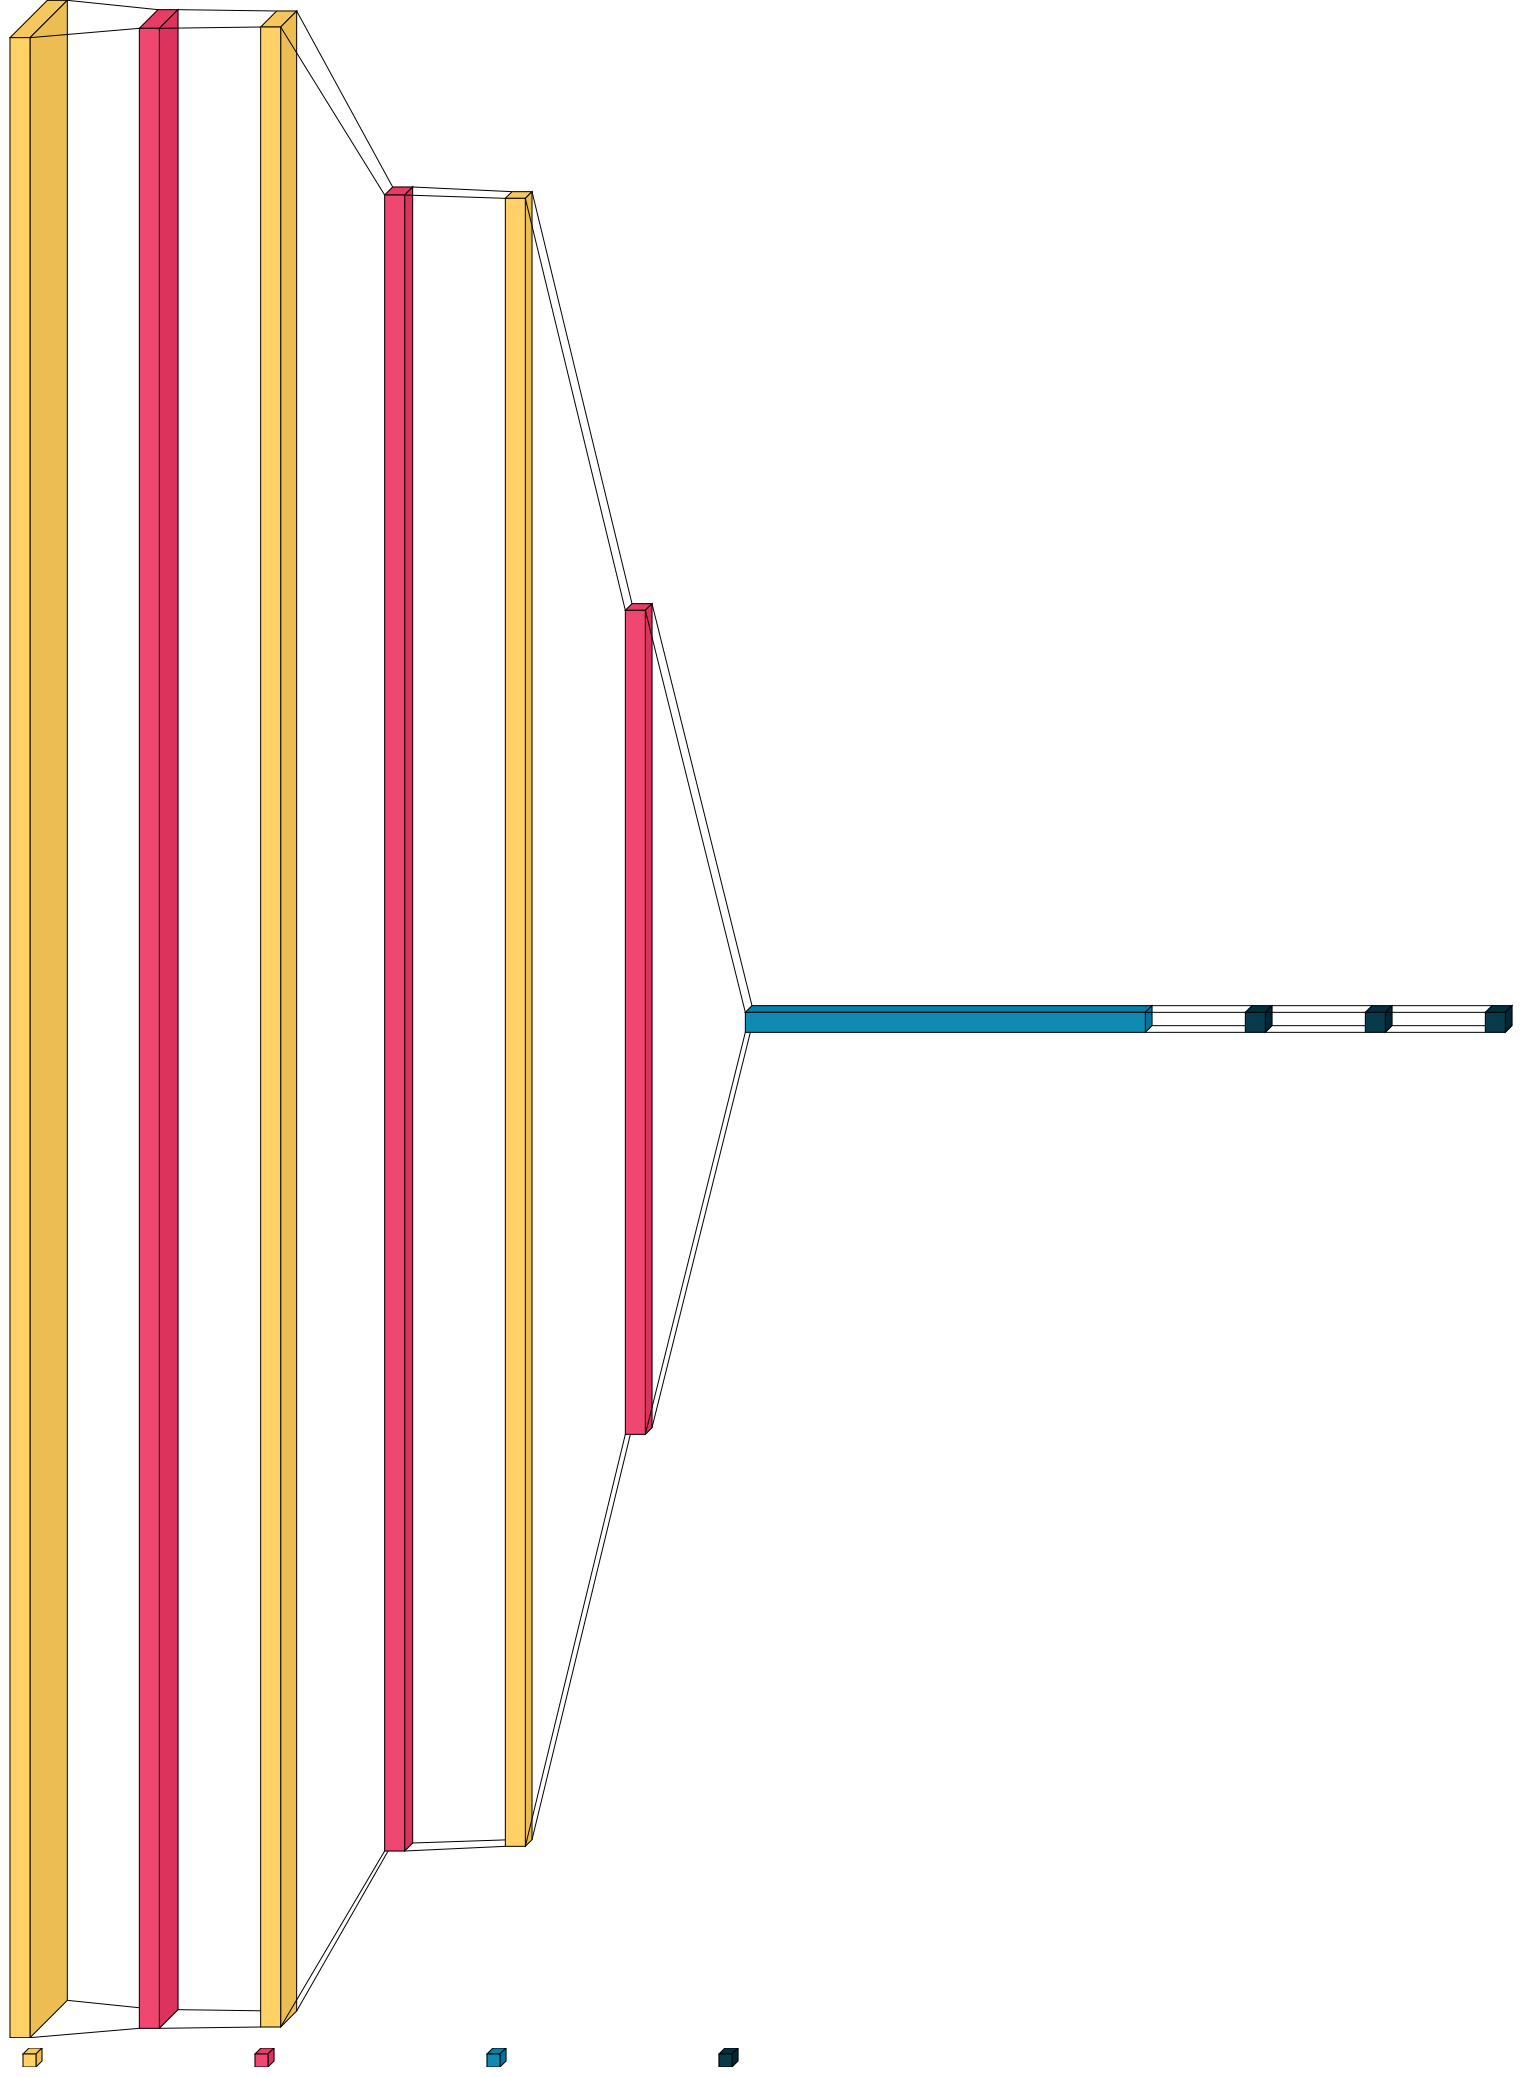

In [25]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font,spacing=100)

# Make Predictions

In [23]:
res = model.predict(X_test)

NameError: name 'model' is not defined

In [24]:
actions[np.argmax(res[4])]

'cat'

In [25]:
actions[np.argmax(y_test[4])]

'cat'

# Save Weights

In [29]:
model.save('./model.h5')
model.save_weights('./model_weights.h5');

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
del model

In [31]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [32]:
model.load_weights('model_weights.h5')

# Evaluation using Confusion Matrix

In [26]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [27]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [28]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'yhat' is not defined

In [29]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'yhat' is not defined

In [37]:
accuracy_score(ytrue, yhat)

1.0

# Realtime Test

In [34]:
from scipy import stats

In [35]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [37]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'model' is not defined

In [48]:
!pip install numpy --upgrade

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.1.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.2 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.1.2 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.1.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.2 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.1.2 which is incompatible.
streamlit 1.30.0 requires numpy


     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     -------------------------------- ----- 51.2/59.7 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 396.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB 653.6 kB/s eta 0:00:20
   ---------------------------------------- 0.1/12.9 MB 1.1 MB/s eta 0:00:13
   ---------------------------------------- 0.1/12.9 MB 901.1 kB/s eta 0:00:15
   ---------------------------------------- 0.1/12.9 MB 950.9 kB/s eta 0:00:14
    --------------------------------------- 0.2/12.9 MB 919.0 kB/s eta 0:00:14
    --------------------------------------- 0.2/12.9 MB 942.1 kB/s eta 0:00:14
   - -------------------------------------- 0.3/12.9 MB 967.8 kB/s eta 0:00:13
   - -------------------------------------- 0.4/12.9 MB 1.0 MB/s eta 0:00

In [41]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

signs = ['hello', 'thanks', 'iloveyou']
actions = np.array(['hello', 'thanks', 'iloveyou'])


mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR-CONVERSION BGR-to-RGB
    image.flags.writeable = False                  # Convert image to not-writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Convert image to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR-COVERSION RGB-to-BGR
    return image, results

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
    
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

model = tf.keras.models.load_model('model.h5')
model.load_weights('model_weights.h5')
model.summary()

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #print(sentence)
        #word = sentence[-1:]
        #convert_to_audio(word[0]) if (len(word) != 0) else print("word not detected yet")
        #convert_to_audio(word[0])
        
        # Show to screen
        cv2.imshow('Realtime LSTM Sign Language Detection', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [49]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score


In [46]:
# 1. Define and Train LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 18s 230ms/step - loss: 2.7139 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0534 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.2977 - categorical_accuracy: 0.2824
Epoch 4/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.1164 - categorical_accuracy: 0.2235
Epoch 5/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0093 - categorical_accuracy: 0.5059
Epoch 6/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.9488 - categorical_accuracy: 0.5294
Epoch 7/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7870 - categorical_accuracy: 0.6588
Epoch 8/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.6775 - categorical_accuracy: 0.7294
Epoch 9/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.6037 - categorical_accuracy: 

In [50]:
# 2. Define and Train CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 1662, 1)))  # Adjust shape as needed
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(actions.shape[0], activation='softmax'))

cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train.reshape(X_train.shape[0], 30, 1662, 1), y_train, epochs=2000)



Epoch 1/2000
3/3 [==============================] - 34s 9s/step - loss: 13.9739 - accuracy: 0.2353
Epoch 2/2000
3/3 [==============================] - 21s 5s/step - loss: 9.4846 - accuracy: 0.2941
Epoch 3/2000
3/3 [==============================] - 29s 10s/step - loss: 7.8249 - accuracy: 0.2706
Epoch 4/2000
3/3 [==============================] - 21s 8s/step - loss: 5.8242 - accuracy: 0.2471
Epoch 5/2000


KeyboardInterrupt: 

In [ ]:
# 3. Define and Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100)
X_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten for RF
rf_model.fit(X_flat, np.argmax(y_train, axis=1))

In [43]:
# 4. Evaluate Each Model and Compare Accuracies
# LSTM Model Evaluation
lstm_res = model.predict(X_test)
lstm_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(lstm_res, axis=1))
print(f'LSTM Accuracy: {lstm_accuracy * 100:.2f}%')

1/1 [==============================] - 1s 651ms/step
LSTM Accuracy: 20.00%


In [1]:
# CNN Model Evaluation
cnn_res = cnn_model.predict(X_test.reshape(X_test.shape[0], 30, 1662, 1))  # Adjust shape as necessary
cnn_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(cnn_res, axis=1))
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')

NameError: name 'cnn_model' is not defined

In [45]:
# Random Forest Model Evaluation
rf_res = rf_model.predict(X_test.reshape(X_test.shape[0], -1))  # Flatten for RF
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_res)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%


In [46]:
# Compare accuracies
accuracies = {
    'LSTM': lstm_accuracy,
    'CNN': cnn_accuracy,
    'Random Forest': rf_accuracy
}
best_model = max(accuracies, key=accuracies.get)
print(f'Best Model: {best_model} with accuracy: {accuracies[best_model] * 100:.2f}%')

NameError: name 'cnn_accuracy' is not defined

In [47]:
# 5. Real-Time Detection Loop (this part remains unchanged)
sequence = []
sentence = []
predictions = []
threshold = 0.5

model = tf.keras.models.load_model('model.h5')
model.load_weights('model_weights.h5')
model.summary()

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # Visualize results
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('Realtime LSTM Sign Language Detection', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [2]:
# 3. Generate confusion matrix and accuracy score
confusion_matrix_cnn = multilabel_confusion_matrix(ytrue_cnn, yhat_cnn)
cnn_accuracy = accuracy_score(ytrue_cnn, yhat_cnn)


NameError: name 'multilabel_confusion_matrix' is not defined